In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.drop(columns=["availability","society","balcony"],inplace=True)

In [8]:
df.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(13246, 6)

In [11]:
df.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df.duplicated().sum()

810

In [13]:
df.drop_duplicates(inplace=True)

# EDA and Data Cleaning

<AxesSubplot:xlabel='price', ylabel='Count'>

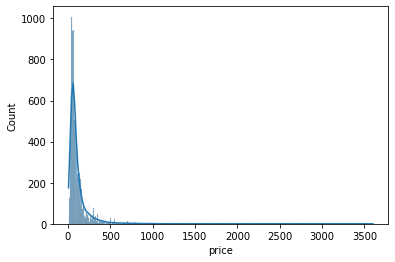

In [14]:
sns.histplot(df.price,kde=True)

## Insights
- Right skewed data

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_type', ylabel='count'>

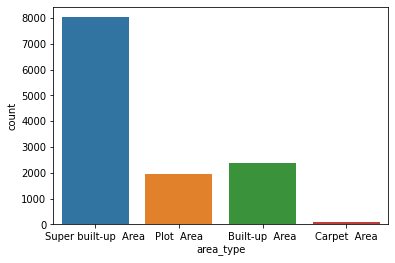

In [15]:
sns.countplot(df.area_type)

In [16]:
df.area_type = df.area_type.replace(r'\s+', ' ', regex=True)

<AxesSubplot:xlabel='area_type', ylabel='price'>

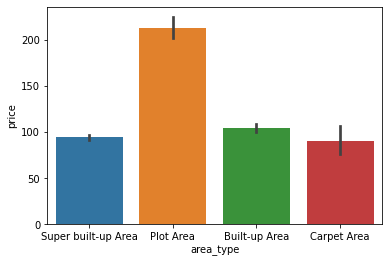

In [17]:
sns.barplot(x=df.area_type,y=df.price)

## Insights
- Plot Area houses are generally more expensive followed by built-up, super built-up and carpet

In [18]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [19]:
df['BHK']=df['size'].apply(lambda x: int(x.split(' ')[0]))

In [20]:
df.drop(columns="size",inplace=True)

In [21]:
df.head()

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2


In [22]:
df.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [23]:
df[df.BHK > 15]

,area_type,location,total_sqft,bath,price,BHK
1718,Super built-up Area,2Electronic City Phase II,8000,27.0,230.0,27
3379,Super built-up Area,1Hanuman Nagar,2000,16.0,490.0,19
3609,Super built-up Area,Koramangala Industrial Layout,10000,16.0,550.0,16
4684,Plot Area,Munnekollal,2400,40.0,660.0,43
11559,Plot Area,1Kasavanhalli,1200,18.0,200.0,18


In [24]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12436 entries, 0 to 13318
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12436 non-null  object 
 1   location    12436 non-null  object 
 2   total_sqft  12436 non-null  object 
 3   bath        12436 non-null  float64
 4   price       12436 non-null  float64
 5   BHK         12436 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 938.1+ KB


In [26]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [27]:
df[~df.total_sqft.apply(isfloat)]

,area_type,location,total_sqft,bath,price,BHK
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12955,Super built-up Area,Thanisandra,1437 - 1629,3.0,75.885,3
12975,Super built-up Area,Whitefield,850 - 1060,2.0,38.190,2
12990,Super built-up Area,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Super built-up Area,Harlur,1200 - 1470,2.0,72.760,2


In [28]:
def convert_flt(x):
    y = x.split('-')
    if len(y)==2:
        x = (float(y[0])+float(y[1]))/2
    try:
        return float(x)
    except:
        return None

In [29]:
df["total_sqft"] = df["total_sqft"].apply(convert_flt)
df.dropna(inplace=True)

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

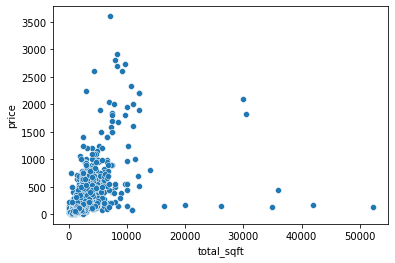

In [30]:
sns.scatterplot(x=df.total_sqft,y=df.price)

- Too Many Outliers

<AxesSubplot:xlabel='area_type', ylabel='total_sqft'>

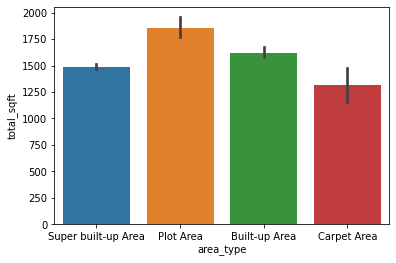

In [31]:
sns.barplot(x=df.area_type,y=df.total_sqft)

<AxesSubplot:xlabel='total_sqft', ylabel='Count'>

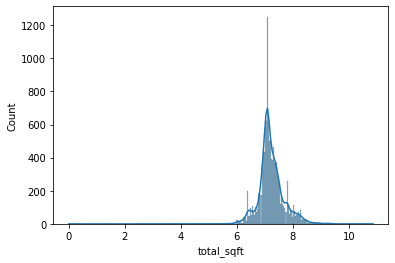

In [32]:
sns.histplot(np.log(df.total_sqft),kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

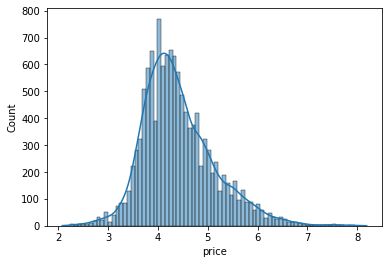

In [33]:
sns.histplot(np.log(df.price),kde=True)

In [34]:
df.head()

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2


In [35]:
df.location.nunique()

1298

In [36]:
df.location = df.location.apply(lambda x: x.strip())

In [37]:
locations = df.location.value_counts()

In [38]:
df.location.value_counts()

Whitefield                        502
Sarjapur  Road                    358
Electronic City                   282
Thanisandra                       225
Kanakpura Road                    217
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Kannur                              1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1287, dtype: int64

In [39]:
loc = locations[locations <= 10]

In [40]:
df["location"] = df["location"].apply(lambda x: "other" if x in loc else x )

In [41]:
df.location.nunique()

231

In [42]:
df.head()

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2


In [43]:
df.drop(columns="area_type",inplace=True)

In [44]:
df1 = df.copy()
df1["price_per_sqft"]=df["price"]*1000000/df["total_sqft"]

## Outlier Removal

In [45]:
df1.price_per_sqft.describe()

count    1.239000e+04
mean     8.097282e+04
std      1.101567e+06
min      2.678298e+03
25%      4.306220e+04
50%      5.500000e+04
75%      7.440476e+04
max      1.200000e+08
Name: price_per_sqft, dtype: float64

In [46]:
max_pps = df1.price_per_sqft.quantile(0.90)
min_pps = df1.price_per_sqft.quantile(0.10)

In [47]:
df1.price_per_sqft.quantile(0.90)

118776.84049079765

In [48]:
df1 = df1[ (df1.price_per_sqft >= min_pps) & (df1.price_per_sqft <= max_pps) ]

In [49]:
df1["area_per_bed"] = df["total_sqft"]/df["BHK"]

In [50]:
df1["area_per_bed"].describe()

count    9912.000000
mean      577.913660
std       208.477992
min        75.000000
25%       492.000000
50%       562.500000
75%       630.000000
max      7500.000000
Name: area_per_bed, dtype: float64

In [51]:
 df1["area_per_bed"].quantile(0.1)

410.0

In [52]:
df2 = df1[df1["area_per_bed"]>350]

In [53]:
df2.shape

(9384, 7)

In [54]:
df2.BHK.unique()

array([ 2,  4,  3,  1,  8,  6,  5,  7, 11,  9, 10, 16, 13], dtype=int64)

In [55]:
new_df = df2[df1.BHK <= 10]

C:\Users\HP\AppData\Local\Temp/ipykernel_276/1978770873.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = df2[df1.BHK <= 10]


In [56]:
new_df.shape

(9381, 7)

In [57]:
df2.BHK.describe()

count    9384.000000
mean        2.596654
std         0.889045
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        16.000000
Name: BHK, dtype: float64

In [58]:
new_df.BHK.describe()

count    9381.000000
mean        2.593220
std         0.867423
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        10.000000
Name: BHK, dtype: float64

<AxesSubplot:xlabel='BHK', ylabel='Count'>

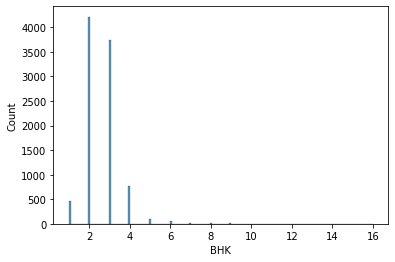

In [59]:
sns.histplot(df2.BHK)

<AxesSubplot:xlabel='BHK', ylabel='Count'>

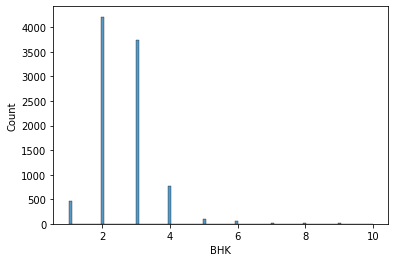

In [60]:
sns.histplot(new_df.BHK)

In [61]:
new_df.bath.quantile(0.99)

6.0

In [62]:
new_df.bath.describe()
new_df = new_df[new_df.bath <= 11]

In [63]:
new_df.bath = new_df.bath.astype(int)

<AxesSubplot:xlabel='bath', ylabel='Count'>

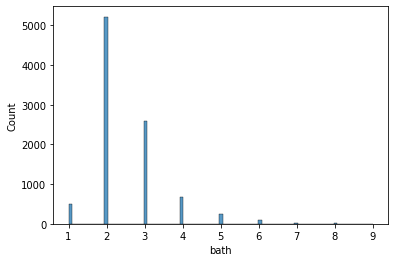

In [64]:
sns.histplot(new_df.bath)

In [65]:
new_df.drop(columns=["price_per_sqft","area_per_bed"],inplace=True)

In [66]:
new_df.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2,39.07,2
1,Chikka Tirupathi,2600.0,5,120.00,4
2,Uttarahalli,1440.0,2,62.00,3
3,Lingadheeranahalli,1521.0,3,95.00,3
4,Kothanur,1200.0,2,51.00,2


In [67]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [68]:
X = new_df.drop("price",axis=1)
y = new_df["price"]

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)
ct = ColumnTransformer(transformers=[
                    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0])],
                        remainder='passthrough')

## Model Building

### Linear Regression

In [70]:
lr = LinearRegression()
linear = Pipeline([
    ('trf',ct),
    ('train',lr)])

linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.835834827020331
MAE:  20.146798897018613


### Ridge

In [71]:
rr = Ridge()
ridge = Pipeline([
    ('trf',ct),
    ('train',rr)])

ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.836240899823626
MAE:  20.067349469594905


### Lasso

In [72]:
ls = Lasso()
lasso = Pipeline([
    ('trf',ct),
    ('train',ls)])

lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.81815663150562
MAE:  21.80336176806913


### SVR

In [73]:
sv = SVR()
support = Pipeline([
    ('trf',ct),
    ('train',sv)])

support.fit(X_train,y_train)
y_pred = support.predict(X_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.5984291362887653
MAE:  23.122140947636755


### DecisionTrees

In [74]:
dt = DecisionTreeRegressor()
decision = Pipeline([
    ('trf',ct),
    ('train',dt)])

decision.fit(X_train,y_train)
y_pred = decision.predict(X_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.7052327871817443
MAE:  21.488170755485626


### RandomForest

In [75]:
rf = RandomForestRegressor()
random = Pipeline([
    ('trf',ct),
    ('train',rf)])

random.fit(X_train,y_train)
y_pred = random.predict(X_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.8164371814251151
MAE:  18.428904009941142


### GradientBossting

In [76]:
gb = GradientBoostingRegressor()
grad = Pipeline([
    ('trf',ct),
    ('train',gb)])

grad.fit(X_train,y_train)
y_pred = grad.predict(X_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.8302682342598422
MAE:  19.799576740289933


### Adaboost

In [77]:
ab = AdaBoostRegressor()
ada = Pipeline([
    ('trf',ct),
    ('train',ab)])

ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.7950010825950572
MAE:  23.6867394068812


### ExtraTrees

In [78]:
xt = ExtraTreesRegressor()
extra = Pipeline([
    ('trf',ct),
    ('train',xt)])

extra.fit(X_train,y_train)
y_pred = extra.predict(X_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.807895026759598
MAE:  18.74746287214125


### XGBoost

In [79]:
xg = XGBRegressor(max_depth=8)
xtreme = Pipeline([
    ('trf',ct),
    ('train',xg)])

xtreme.fit(X_train,y_train)
y_pred = xtreme.predict(X_test)
print('r2_score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.8066555860207731
MAE:  18.690062695037582


In [80]:
import pickle

pickle.dump(ridge,open("ridge.pkl",'wb'))
pickle.dump(new_df,open("data.pkl",'wb'))